<a href="https://colab.research.google.com/github/Lakshmi-aimlds/myrepo/blob/main/projects/PYF_Project_LearnerNotebook_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

By: Lakshmi Devesh Kumar

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# importing plotly
import plotly.express as px

In [ ]:
# Run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Understanding the structure of the data

In [ ]:

# read the data
df = pd.read_csv('/content/drive/MyDrive/Python Course/Project1/foodhub_order.csv')
# returns the first 5 rows
df.head(20)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28,21
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30
8,1477174,121706,Anjappar Chettinad,Indian,16.44,Weekday,5,21,26
9,1477311,39705,Bukhara Grill,Indian,7.18,Weekday,5,29,26


#### Observations:

* The 'foodhub_order' dataset contains data related to the orders placed by customers, customer id, the restaurant name, cuisine type, cost, day of week, rating and food preparation and delivery times.
* The restaurants can belong to cuisine types such as American, Indian, Mediterranean, etc.
* A customer could have ordered from different restaurants
* The day of the week data has been categorised as Weekday and Weekend and we can analyse the orders based on this data
* Rating column has some values as 'Not given'.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Write your code here
df.shape
print("There are", df.shape[0], 'rows and', df.shape[1], "columns.")

There are 1898 rows and 9 columns.


#### Observations:
* There are 1898 rows and 9 columns present in the data.



### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


*   There are 4 object type columns, restaurant_name, cuisine_type, day_of_the_week and rating and 5 numerical columns.
* We can see that the total number of observations are 1898 and that there are no missing values for all 9 columns.
*   ***Ratings column data is a non-numerical value. We may find more insights if it can be changed to a numerical column for better analysis.***



### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Write your code here
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:


*   There are no missing values in the data.
*   However, since the "rating" column is not numerical and is a string and we can observe that there are a bunch of rows with value as "Not given", may be we can consider that as a null value.







### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Write your code here
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:

*   The min time to prepare food is 20 minutes,
*   The avg time to prepare food is 27.37 minutes.
*   The max time to prepare fod is 35 minutes.
*   The min, avg. and max delivery times are 15, 25 and 33 minutes respectively.
*   The min, avg. and max cost of the order is 4.47, 14.14 and 35.41 dollars respectively.
*   The order id lies between values 1476547 (min) and 1478444 (max)
*   The customer id values lie between 1311 (min) and 405334 (max)



### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Total number of rating values
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

In [ ]:
#We can also get the count of ratings where the value is "Not given"
df[df['rating']=='Not given'].shape[0]

736

In [ ]:
# We can add a new column to the df data frame called ratingnum which can contain the rating values converted to numerical values using the astype mentod as shown below:
df['ratingnum']=df[df['rating']!='Not given']['rating'].astype(int)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,ratingnum
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,NaN
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,NaN
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,5.0
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,3.0
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,4.0


In [ ]:
#Statistical summary of the datset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00
ratingnum,1162.0,4.344234e+00,0.741478,3.00,4.00,5.00,5.000000e+00,5.00


In [ ]:
# Percentage of orders having different ratings.
df.ratingnum.value_counts(normalize=True, dropna=False)

NaN    0.387777
5.0    0.309800
4.0    0.203372
3.0    0.099052
Name: ratingnum, dtype: float64

#### Observations:

*   We can observe that there are a total of 736 rows for which the ratings have the value as "Not given".
*   So, out of 1898 observations, 736 do not have a rating and 1162 orders have ratings ranging from 3 to 5. So, about 38.78% of the observations do not have rating in the data.
*   30.98% of the total orders have rating as 5
*   20.34% of the total orders have rating as 4
*   9.9% of the total orders have the rating as 3

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

#### Order ID

In [ ]:
# check unique order ID
df['order_id'].nunique()

1898

#### Customer ID

In [ ]:
# check unique customer ID
df['customer_id'].nunique()

1200

#### Restaurant name

In [ ]:
# check unique Restaurant Name
df['restaurant_name'].nunique()

178

#### Cuisine type

In [ ]:
# Check unique cuisine type
df['cuisine_type'].nunique()

14

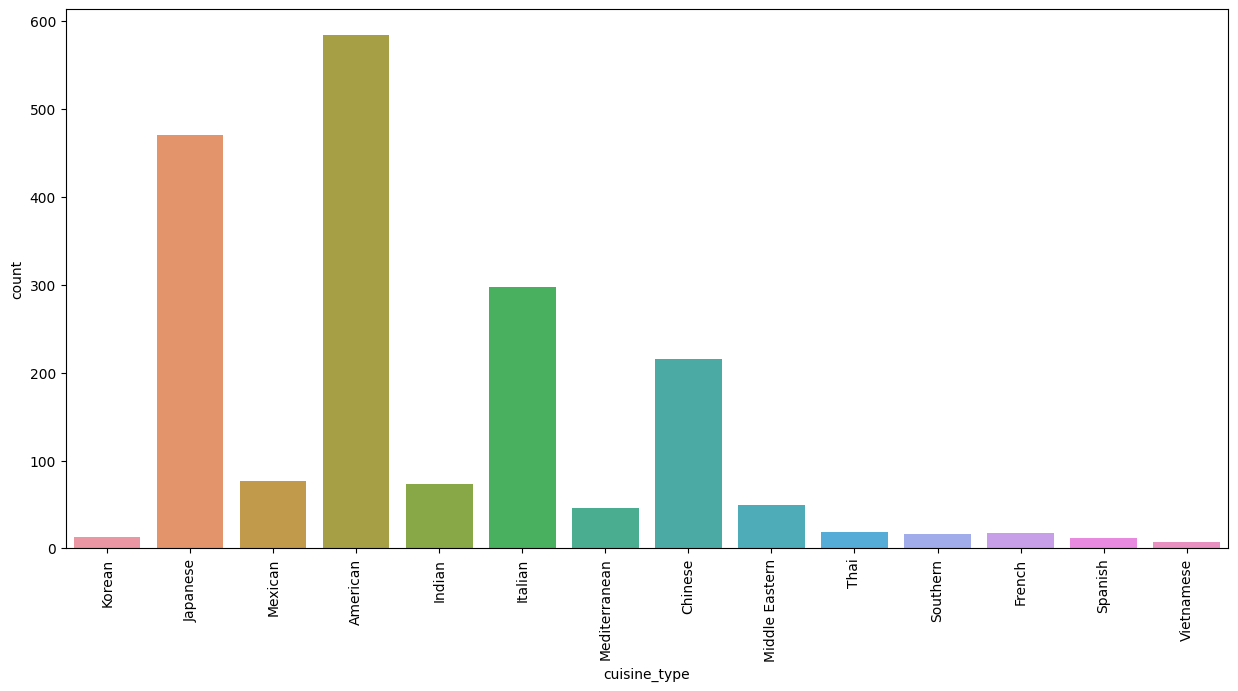

In [ ]:
plt.figure(figsize = (15,7))
sns.countplot(data = df, x = 'cuisine_type') ## Create a countplot for cuisine type.
plt.xticks(rotation=90);

#### Cost of the order

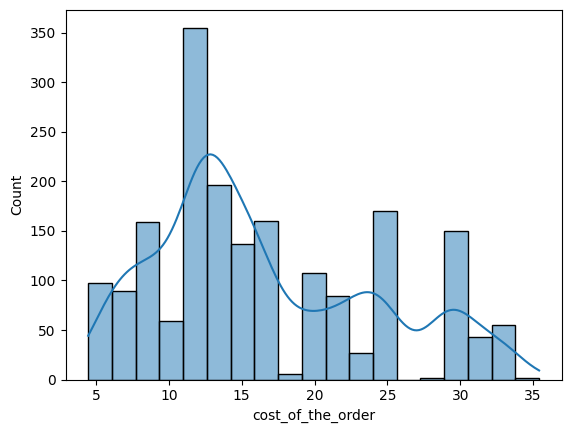

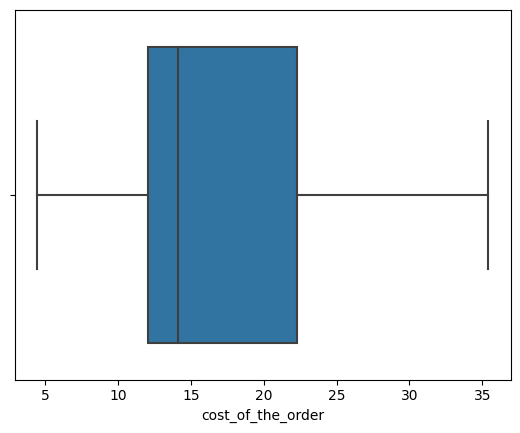

In [ ]:
sns.histplot(data=df,x='cost_of_the_order', kde=True) ## Histogram for the cost of order
plt.show()
sns.boxplot(data=df,x='cost_of_the_order') ## Boxplot for the cost of order
plt.show()

#### Day of the week

In [ ]:
# # Check the unique values
df['day_of_the_week'].unique()

array(['Weekend', 'Weekday'], dtype=object)

<Axes: xlabel='day_of_the_week', ylabel='count'>

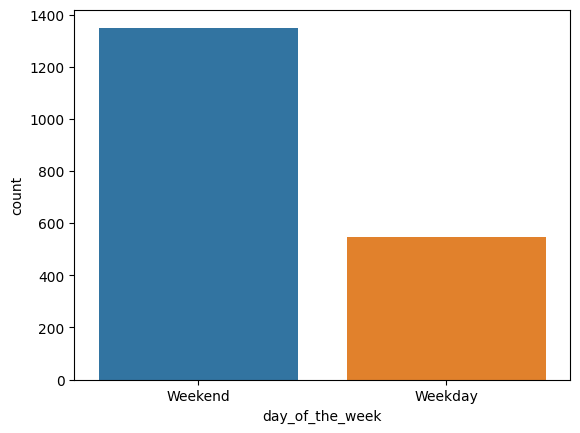

In [ ]:
sns.countplot(data = df, x = 'day_of_the_week') ## Complete the code to plot a bar graph for 'day_of_the_week' column

#### Rating

In [ ]:
# Check the unique values
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

<Axes: xlabel='rating', ylabel='count'>

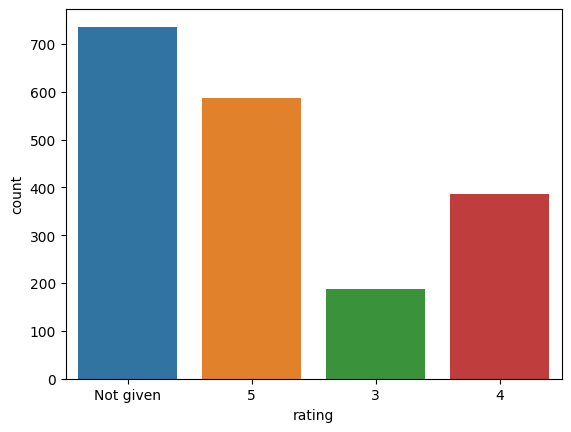

In [ ]:
sns.countplot(data = df, x = 'rating')

#### *Ratingnum (New numerical rating column)*

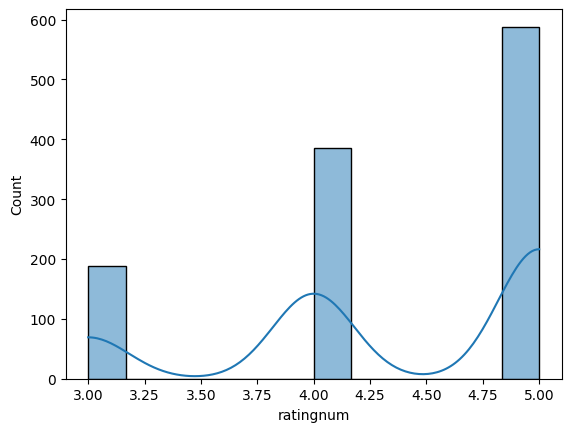

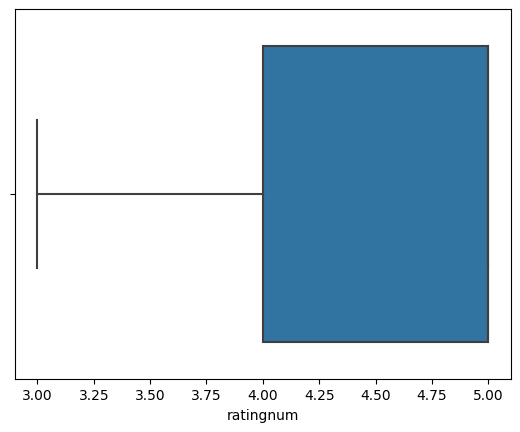

In [ ]:
# Numerical column ratingnum
sns.histplot(data=df, x='ratingnum', kde=True)
plt.show()
sns.boxplot(data=df,x='ratingnum') ## Boxplot for the ratingnum
plt.show()

#### Food Preparation time

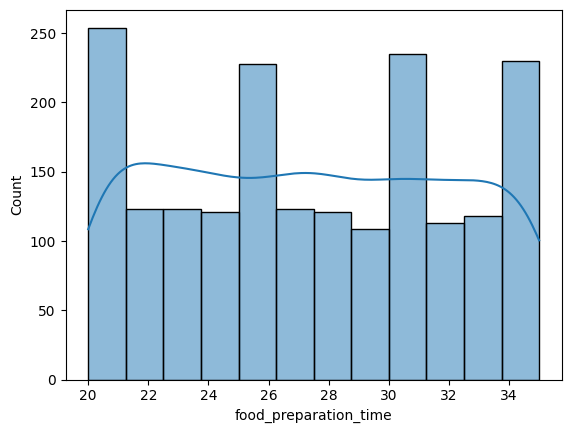

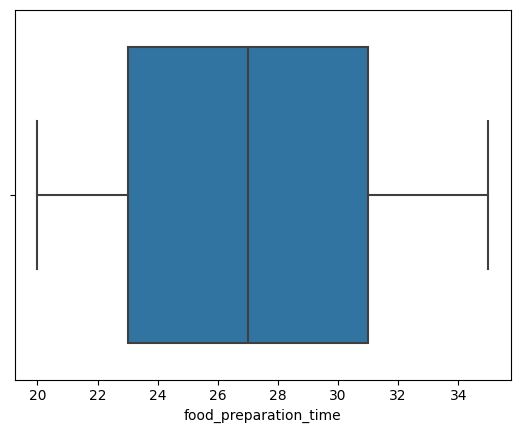

In [ ]:
sns.histplot(data=df,x='food_preparation_time', kde=True) ## Complete the code to plot the histogram for the cost of order
plt.show()
sns.boxplot(data=df,x='food_preparation_time') ## Complete the code to plot the boxplot for the cost of order
plt.show()

#### Delivery time

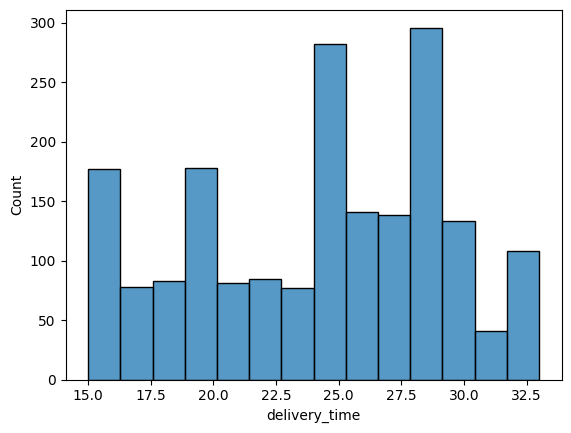

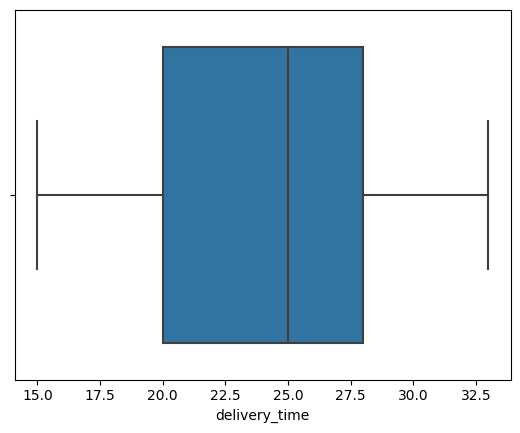

In [ ]:
sns.histplot(data=df,x='delivery_time') ## Complete the code to plot the histogram for the delivery time
plt.show()
sns.boxplot(data=df,x='delivery_time') ## Complete the code to plot the boxplot for the delivery time
plt.show()

#### *Total time (New column which has sum of food_preparation_time and the delivery_time)*

In [ ]:
# Create a new column called total_time in df dataframe that is the sum of food_preparation_time and the delivery_time.
#This time will represent the total time it takes for the customer to receive the food from the time he/ she places the order.
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00
ratingnum,1162.0,4.344234e+00,0.741478,3.00,4.00,5.00,5.000000e+00,5.00
total_time,1898.0,5.153372e+01,6.833603,35.00,47.00,52.00,5.600000e+01,68.00


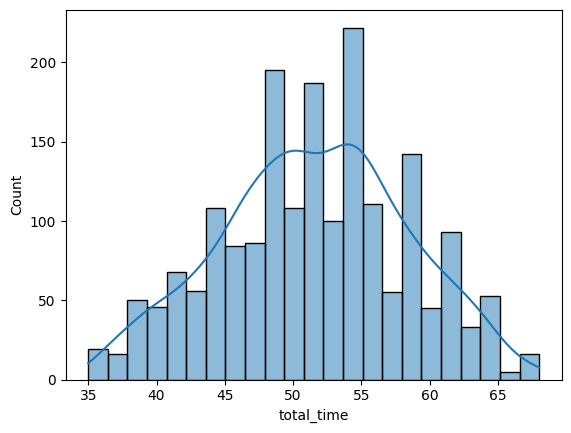

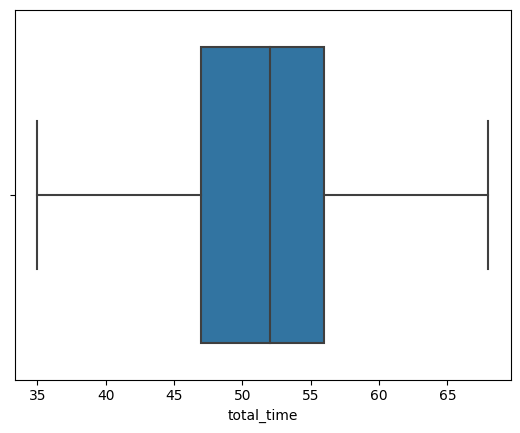

In [ ]:
sns.histplot(data=df,x='total_time', kde=True)
plt.show()
sns.boxplot(data=df,x='total_time')
plt.show()

In [ ]:
#Get mean of total time grouped by day of week
print("Mean of total time grouped by day of week ",df.groupby('day_of_the_week')['total_time'].mean(),"min")

#Get mean of food preparation time grouped by day of week
print("Mean of food preparation time grouped by day of week ",df.groupby('day_of_the_week')['food_preparation_time'].mean(),"min")

#Get mean of delivery time grouped by day of week
print("Mean of delivery time grouped by day of week ",df.groupby('day_of_the_week')['delivery_time'].mean(),"min")

Mean of total time grouped by day of week  day_of_the_week
Weekday    55.552102
Weekend    49.906736
Name: total_time, dtype: float64 min
Mean of food preparation time grouped by day of week  day_of_the_week
Weekday    27.212066
Weekend    27.436714
Name: food_preparation_time, dtype: float64 min
Mean of delivery time grouped by day of week  day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64 min


#### Observations:

*   American cuisine seems to have most number of orders.The next most ordered cuisine is Japanese, followed by Italian, Chinese, Mexican, Indian, etc. Vietnamese cuisine is the least ordered cuise type in this data.
*   There are a total of 1898 orders in the dataset
*   There are a total of 1200 unique customers in the dataset
*   There are a total of 178 unique restaurants in the dataset
*   There are a total of 14 cuisine types
*   The American cuisine type has the most orders and has the most ratings as well.
*   The day of the week is a categorical value and can have values Weekday or Weekend
*    736 orders are unrated, number of orders with rating 5 are 588, number of orders with rating 4 are 386 and number of orders with rating 3 are 188
*    The mean food preparation time is 27.37 min
*    The mean delivery time is 24.16 min


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 140 (\x8c) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 142 (\x8e) missing from current font.



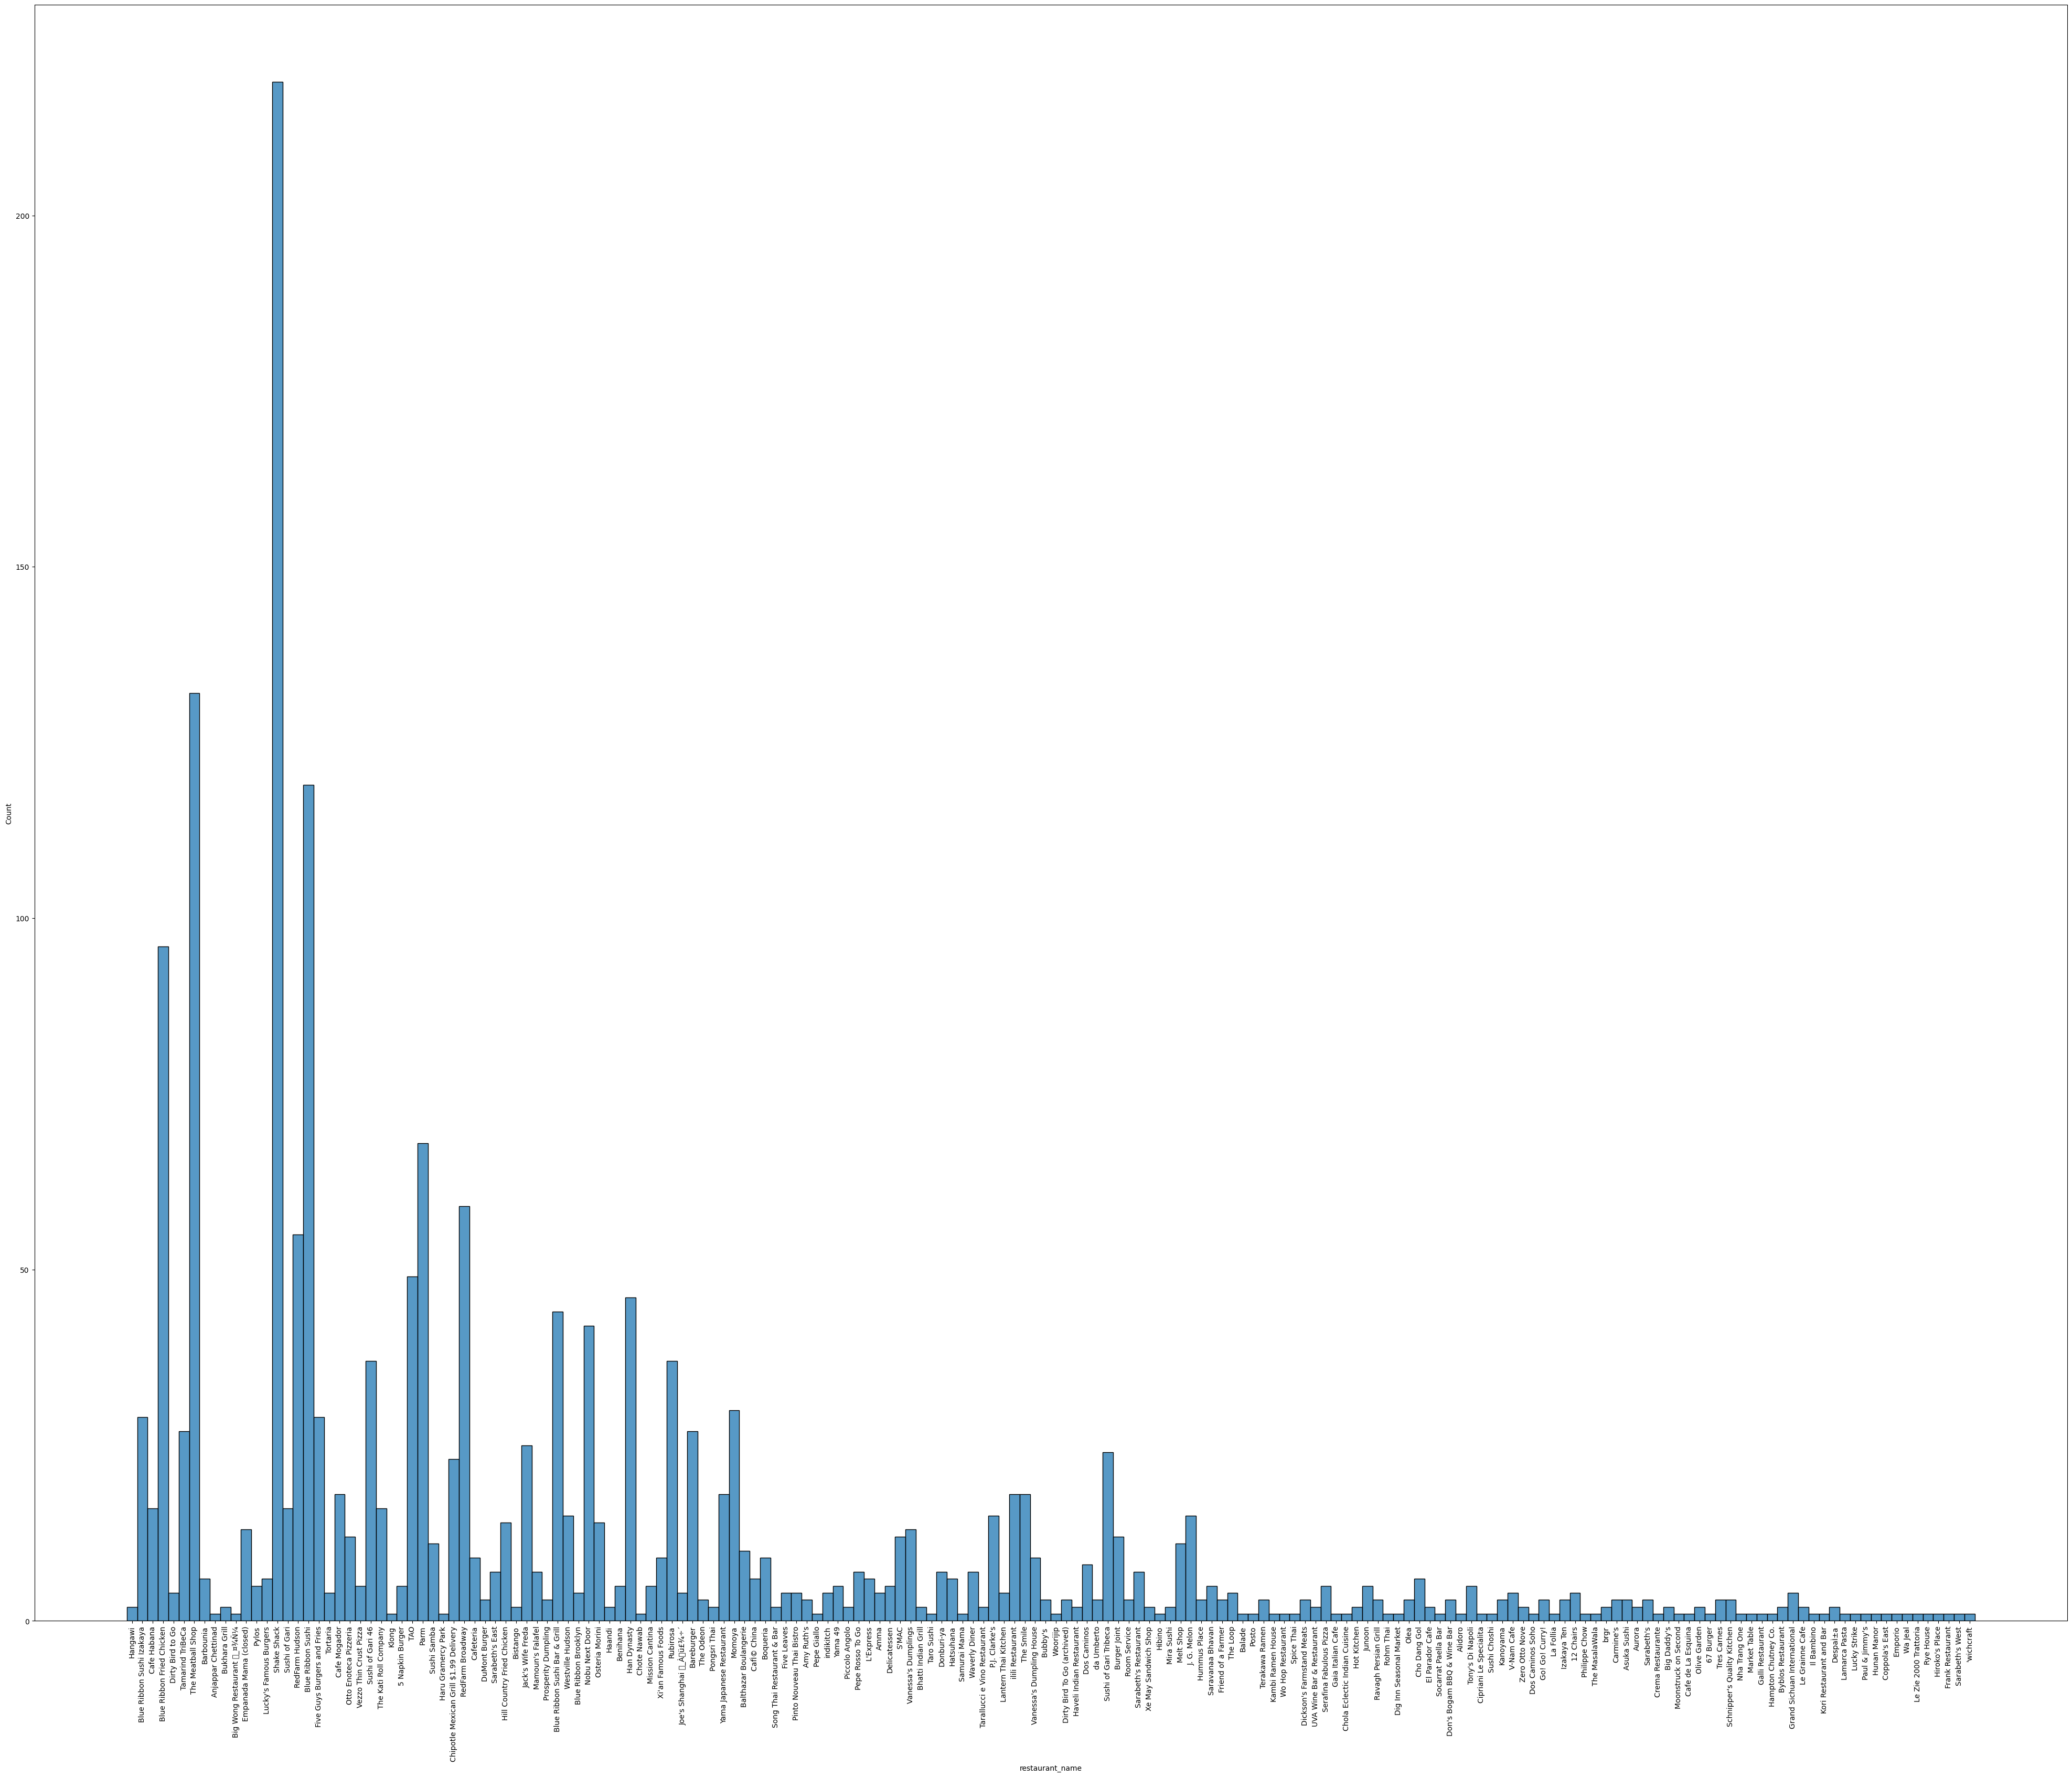

In [ ]:
# Histogram plot of Restaurants
plt.figure(figsize=(50, 40))
sns.histplot(data=df, x='restaurant_name');
plt.xticks(rotation=90);
plt.show();

In [ ]:
#Get order counts of the top 5 restaurants
df['restaurant_name'].value_counts().head(5)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

In [ ]:
#Get the number of unique restaurants in the dataset.
df['restaurant_name'].nunique()

178

#### Observations:


*   The top 5 restaurants that received the most orders are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm.
*   There are a total of 178 restaurants in this data.




### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# The below code gives the number of orders of each cuisine type on both weekdays and weekends.
df.groupby('day_of_the_week')['cuisine_type'].value_counts()

day_of_the_week  cuisine_type  
Weekday          American          169
                 Japanese          135
                 Italian            91
                 Chinese            52
                 Indian             24
                 Mexican            24
                 Middle Eastern     17
                 Mediterranean      14
                 Southern            6
                 French              5
                 Thai                4
                 Vietnamese          3
                 Korean              2
                 Spanish             1
Weekend          American          415
                 Japanese          335
                 Italian           207
                 Chinese           163
                 Mexican            53
                 Indian             49
                 Mediterranean      32
                 Middle Eastern     32
                 Thai               15
                 French             13
                 Korean         

In [ ]:
#In the below code, a new dataframe df_weekend is created which contains the data related to orders
# placed during Weekends.
df_weekend = df[df['day_of_the_week'] == 'Weekend']
#df_weekend.groupby('cuisine_type')['ratingnum'].sum()
#Get the sum of the different ratingnum values for each cuisine type during weekends.
df_weekend.groupby('cuisine_type')['ratingnum'].value_counts()

cuisine_type    ratingnum
American        5.0          125
                4.0           89
                3.0           43
Chinese         5.0           57
                4.0           32
                3.0           18
French          5.0            4
                3.0            2
                4.0            2
Indian          5.0           23
                4.0           11
                3.0            2
Italian         5.0           56
                4.0           35
                3.0           19
Japanese        5.0          102
                4.0           70
                3.0           27
Korean          4.0            3
                3.0            2
                5.0            2
Mediterranean   5.0           12
                3.0            5
                4.0            4
Mexican         5.0           17
                4.0           12
                3.0            3
Middle Eastern  4.0           10
                5.0            5
                3

In [ ]:
#Get the total number of orders grouped by the cuisine type
df_weekend.groupby(['cuisine_type'])['order_id'].nunique()

cuisine_type
American          415
Chinese           163
French             13
Indian             49
Italian           207
Japanese          335
Korean             11
Mediterranean      32
Mexican            53
Middle Eastern     32
Southern           11
Spanish            11
Thai               15
Vietnamese          4
Name: order_id, dtype: int64

In [ ]:
print("Total orders on Weekends for all the cuisine types are: ", df_weekend['order_id'].nunique())

Total orders on Weekends for all the cuisine types are:  1351


#### Observations:
*   There are a total of 1351 orders placed on Weekends
*   The most ordered cuisine during the Weekdays is American with 169 orders and least ordered is Spanish with only 1 order.
*   The most ordered cuisine during the Weekends is again American with 415 orders and least ordered is Vietnamese with only 4 orders.
*   American cuisine seems to have most number of orders.The next most ordered cuisine is Japanese, followed by Italian, Chinese, Mexican, Indian, etc.
Thai, French, Southern, Korean, Spanish and Vietnamese cuisines are the least ordered cuise types in this data.
*   There are a total of 14 cuisine types in the data, out of which the bottom 6 cuisine types, accounts to only 65 orders out of the 1351 total orders on Weekends. This makes up only 4.53% of the df_weekend data set.
*   American cuisine type has the most number of ratings and most number of 5 star ratings as well.
*   ***From all the above observations, we can conclude that American cuisine is the most popular on Weekends.***




### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Write the code here
# The below code gets us the number of observations with cost_of _the_order value greater than 20 dollars
df_greater_than_20 = df.loc[df['cost_of_the_order']>20]
# df_greater_than_20.shape[0] gives the total number or all orders whose cost is greater than 20 dollars.
tot_greater =  df_greater_than_20.shape
tot_greater_rows = tot_greater[0]
print("The number of orders that cost above 20 dollars: ", tot_greater_rows)

# Similarly, we can calculate the total number or orders
tot = df.shape[0]
print("The total number of all the orders: ", tot)

# The below code gives the percentage of orders that cost more than 20 dollars.

perc = tot_greater_rows/tot * 100

print("Percentage of orders that cost above 20 dollars: ", round(perc, 2), '%')


The number of orders that cost above 20 dollars:  555
The total number of all the orders:  1898
Percentage of orders that cost above 20 dollars:  29.24 %


#### Observations:

*   The total number of orders with cost of more than 20 dollars is 555.
*   The total number of all orders are 1898
*   The percentage of orders that cost more than 20 dollars is about 29.24%




### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# The below code gives us the mean of the delivery time.
df_mean_del = df['delivery_time'].mean()

print("The mean delivery time in the data is: ", round(df_mean_del, 2),"minutes")

#print(“%.2”f % df_mean_del) will give the same result as well istead of roud method.

The mean delivery time in the data is:  24.16 minutes


#### Observations:

* The mean order delivery time is 24.16 minutes.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# The below code gives us the customer_id of the top 3 customers who have placed the most orders and the number of orders they have placed.
# These customers are the frequent customers.
df['customer_id'].value_counts().head(3)
#Istead we ca also do df['customer_id'].value_counts()[:3]
# We ca also do top3_customers = df['customer_id'].value_counts().nlargest(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:

*   The customers with customer_ids '52832', '47440' and '83287' have placed the highest number of orders and are the most frequent customers.
*   The total number of orders they have placed  are 13, 10 and 9 respectively.



### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


#### Cuisine vs Cost of the order

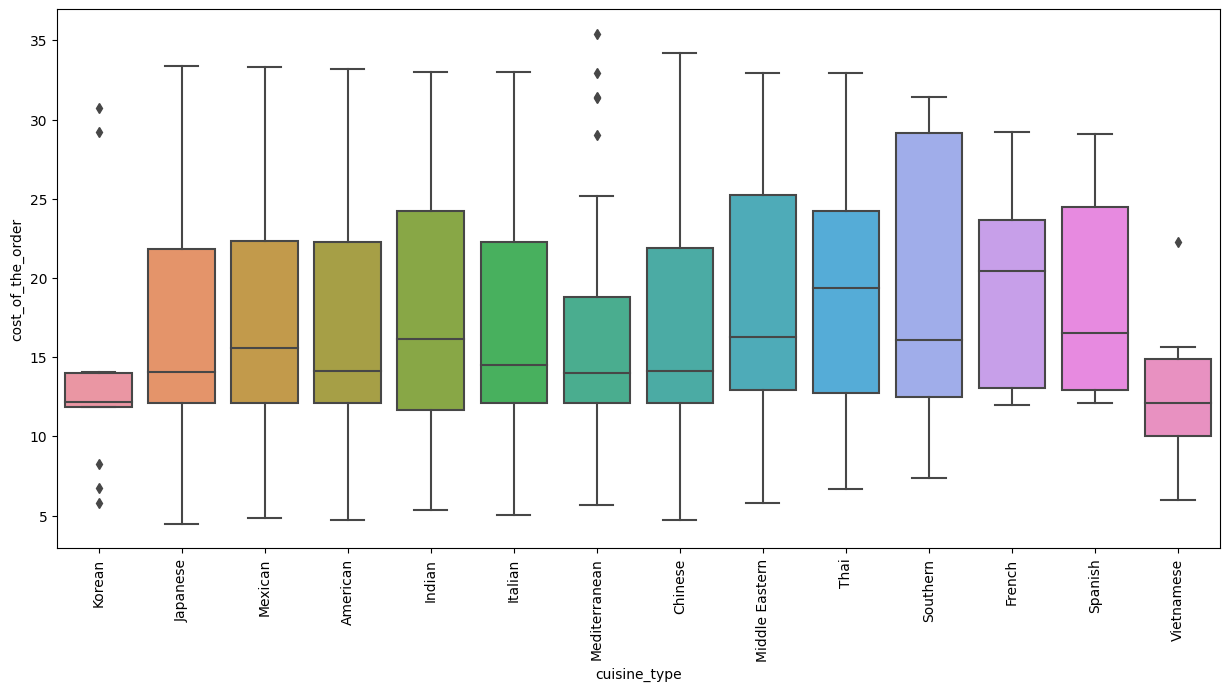

In [ ]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(data = df, x = "cuisine_type", y = "cost_of_the_order")
plt.xticks(rotation = 90)
plt.show()

'''
df_medians = df.groupby('cuisine_type')['cost_of_the_order'].median().reset_index().sort_values('cost_of_the_order', ascending=False)
sns.set(rc={'figure.figsize':(18,12)})
c_list = df_medians['cuisine_type'].tolist()

# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu', order=c_list)
plt.xticks(rotation = 60)
plt.show()
'''


*   The Vietnamese cuisine is the lowest priced with just one outlier order that costs over 20 dollars.
*   The Korean cuisine is also low priced mostly between with 3 orders being extremely cheap, just about 5 dollars with 2 orders costing over 30 dollars.But, mostly from 11 and 15 dollars.
*   The Mediterranean cuisine also has 4 outlier orders that cost over 25 dollars and 1 of those orders costs over 35 dollars!
* From the above boxplot we can clearly observe that most of the Southern food has orders between about 12 and 30 dollars.
*  American, Mexican, Italian, Chinese (almost) and Japanese (almost) has orders that fall in the similar price range.

In [ ]:
'''
Just use point plot or just do the below:

#Should have doe this istead of just tryig to read the graph:
In a loop do this
cuisine_data = df[df['cuisine_type'] == cuisine]

    max_cost = cuisine_data['cost_of_the_order'].max()
    print("Maximum cost of the order of the", cuisine, "cuisine is", max_cost, "dollars")

    min_cost = cuisine_data['cost_of_the_order'].min()
    print("Minimum cost of the order of the", cuisine, "cuisine is", min_cost, "dollars")

    median_cost = cuisine_data['cost_of_the_order'].median()
    print("Median cost of the order of the", cuisine, "cuisine is", median_cost, "dollars")
'''

#### Cuisine vs Food Preparation time

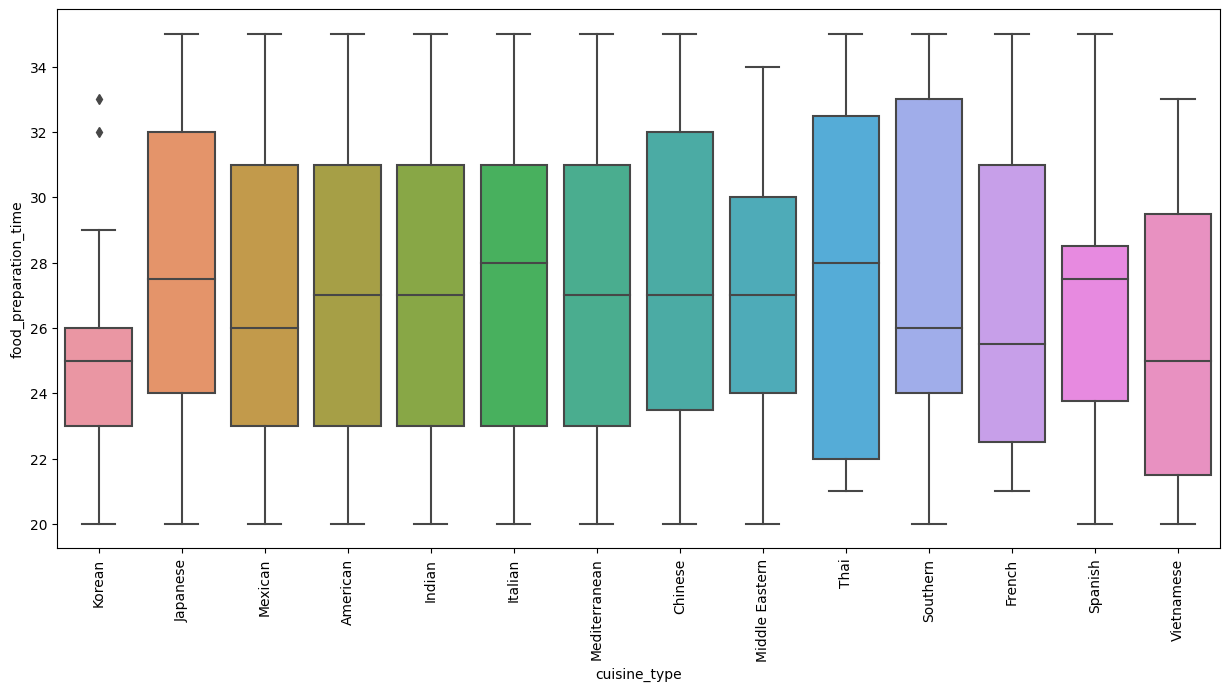

In [ ]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(data=df, x='cuisine_type', y='food_preparation_time')
plt.xticks(rotation = 90)
plt.show()

*   Korean cuisine restaurants have least food preparation times bwtween  23 nd 26 mins with only 2 outlier orders that have food preparation times greater than 31 minutes.
*   American, Mexican, Indian, Italian and Mediterranean cuisine restaurant orders have similar food preparation times between 20 and 35 minutes.

#### Day of the Week vs Delivery time

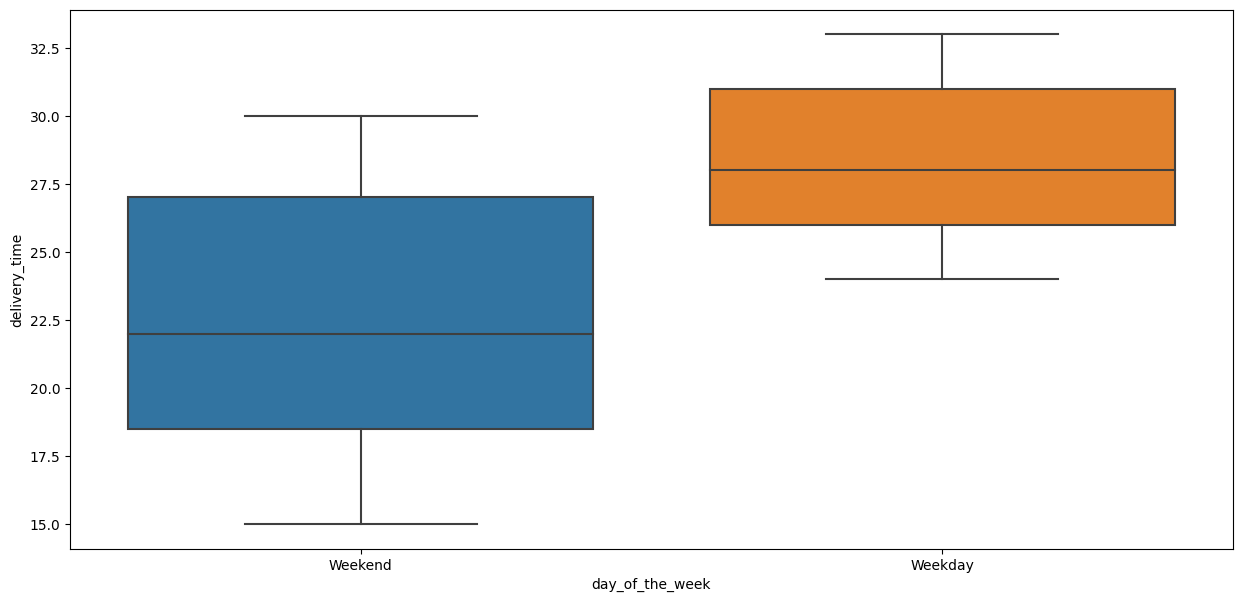

In [ ]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(data=df, x='day_of_the_week', y='delivery_time')
plt.show()

*   When you look at the above boxplot, we can clearly see that the delivery times are higher during Weekdays.
*   This could be due to traffic during working day rush hour. However, this data is not given in the dataset, so we can only guess.

#### Restaurant vs total cost

In [ ]:
#Revenue generated by each Restaurant
df_total_revenue = df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False)
df_total_revenue.head(20)

restaurant_name
Shake Shack                              3579.53
The Meatball Shop                        2145.21
Blue Ribbon Sushi                        1903.95
Blue Ribbon Fried Chicken                1662.29
Parm                                     1112.76
RedFarm Broadway                          965.13
RedFarm Hudson                            921.21
TAO                                       834.50
Han Dynasty                               755.29
Blue Ribbon Sushi Bar & Grill             666.62
Rubirosa                                  660.45
Sushi of Gari 46                          640.87
Nobu Next Door                            623.67
Five Guys Burgers and Fries               506.47
Momoya                                    492.13
Chipotle Mexican Grill $1.99 Delivery     491.69
Blue Ribbon Sushi Izakaya                 485.09
Tamarind TriBeCa                          426.71
Jack's Wife Freda                         416.75
Bareburger                                399.74
Name

*   Shake Shack has the most number of orders and hence it generates the most revenue.

#### Rating vs Delivery time

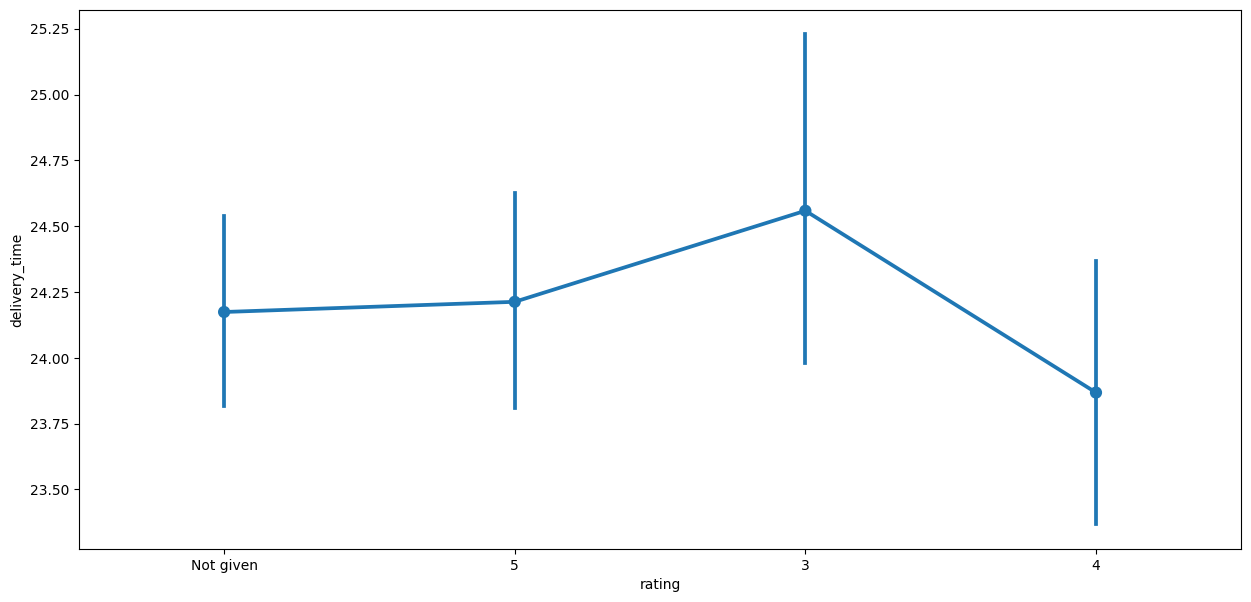

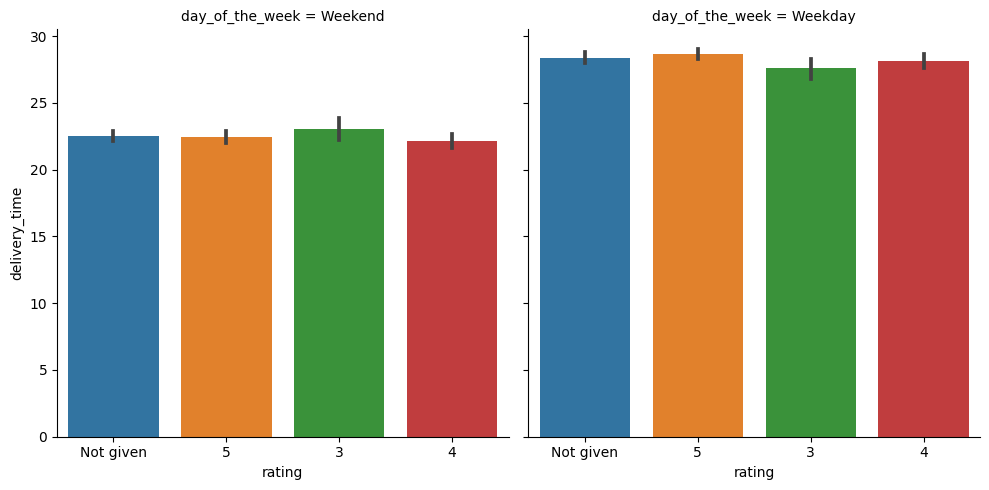

In [ ]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(data = df, x = 'rating', y = 'delivery_time')
plt.show()

#Compare relationship between rating and delivery time during Weekdays and Weekends
sns.catplot(data=df, x="rating", y="delivery_time", col="day_of_the_week", kind='bar')
plt.show()


*   From the point plot, we can observe that the delivery times are highest for orders rating 3
*   From the cat plot, we can observe that during the weekdays, the delivery times are higher compared to weekends
*   For rating 5 and unrated orders have almost similar delivery time range.
*   However, rating 4 orders have the least delivery times and it is lesser than both rating 5 and rating 3 orders, so, we cannot say that the ratings are dependant on the delivery times. In other words, the correlation between the ratings and the delivery times is very low, almost nill.


#### Rating vs Food preparation time

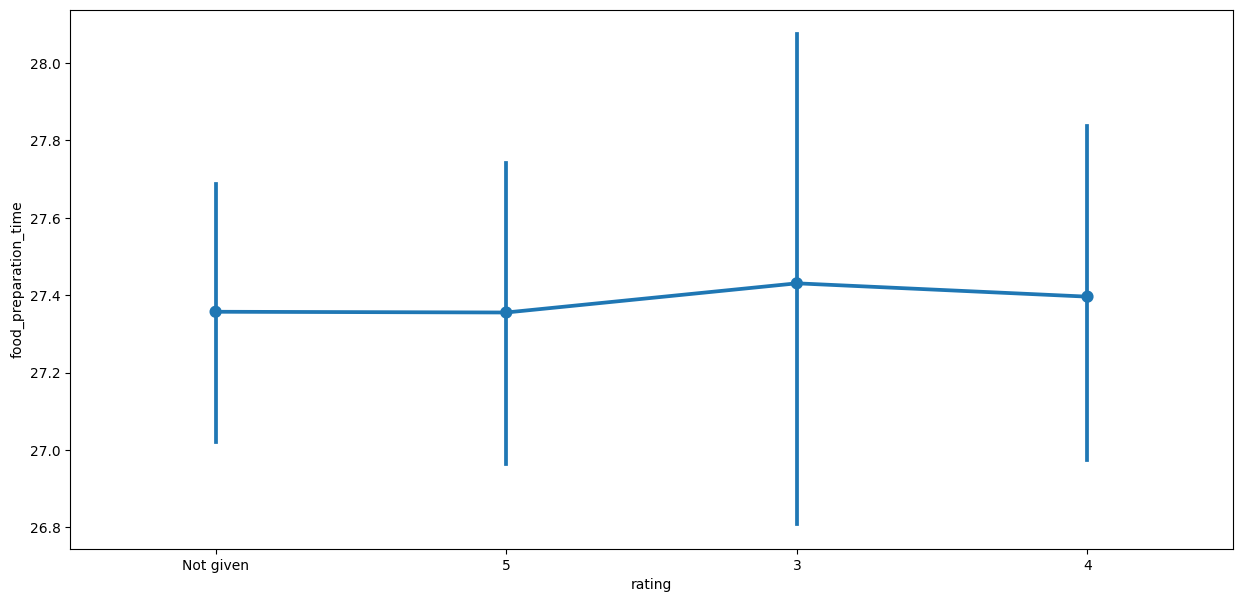

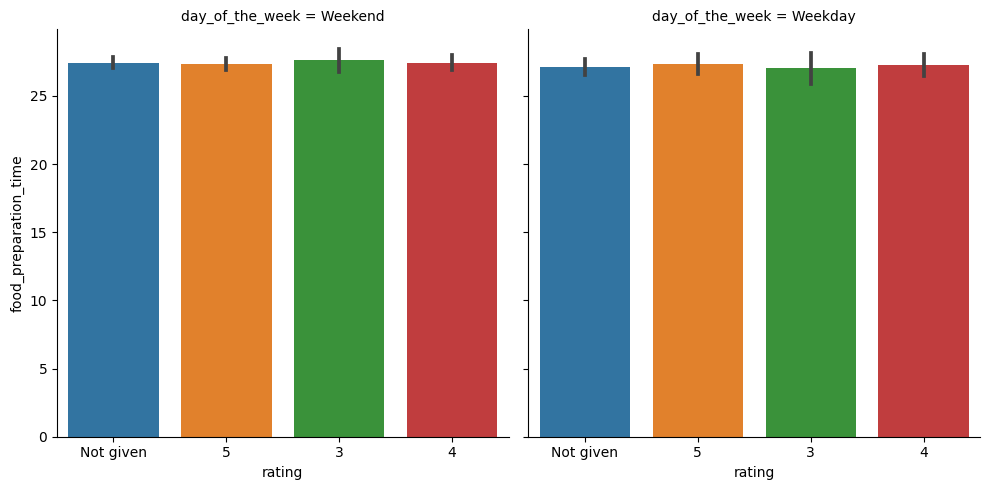

In [ ]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(data = df, x='rating', y='food_preparation_time')

#Compare relationship between rating and food preparation time during Weekdays and Weekends
sns.catplot(data=df, x="rating", y="food_preparation_time", col="day_of_the_week", kind='bar')

plt.show()


*   From the point plot, we can observe that the food preparation times are very close for orders rating 3, 4,5 and unrated orders.
*   From the cat plot, we can observe that the food preparation times for orders during both the weekdays and weekends are almost same.
*   The correlation between the ratings and the food preparation times is very low, almost nill.


#### Rating vs Cost of the order

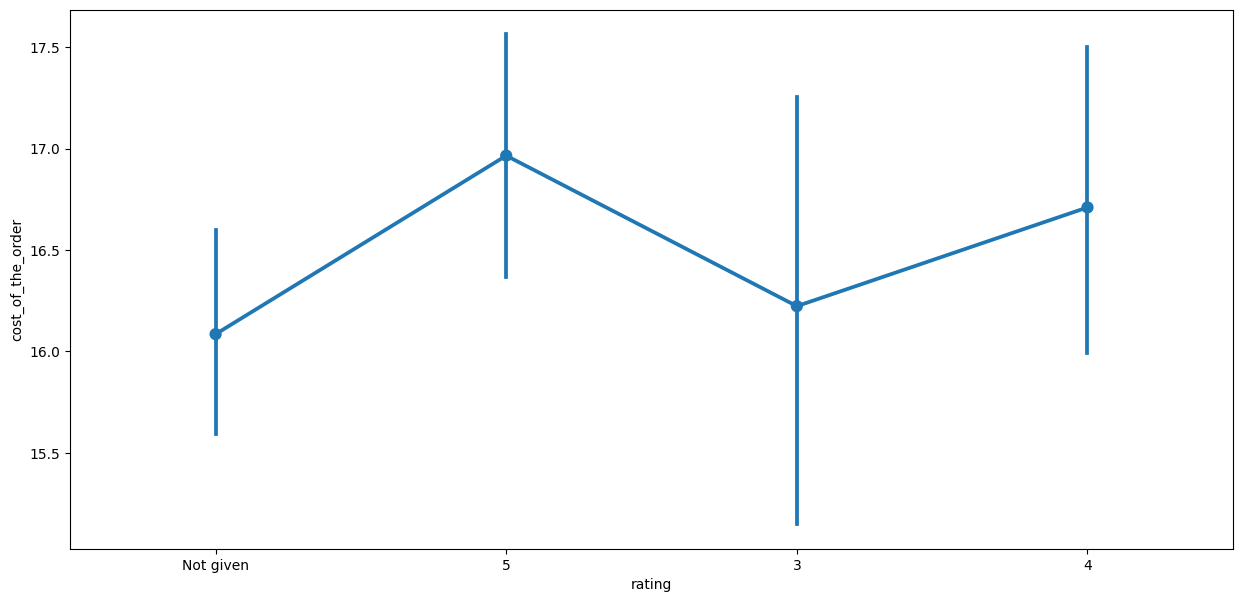

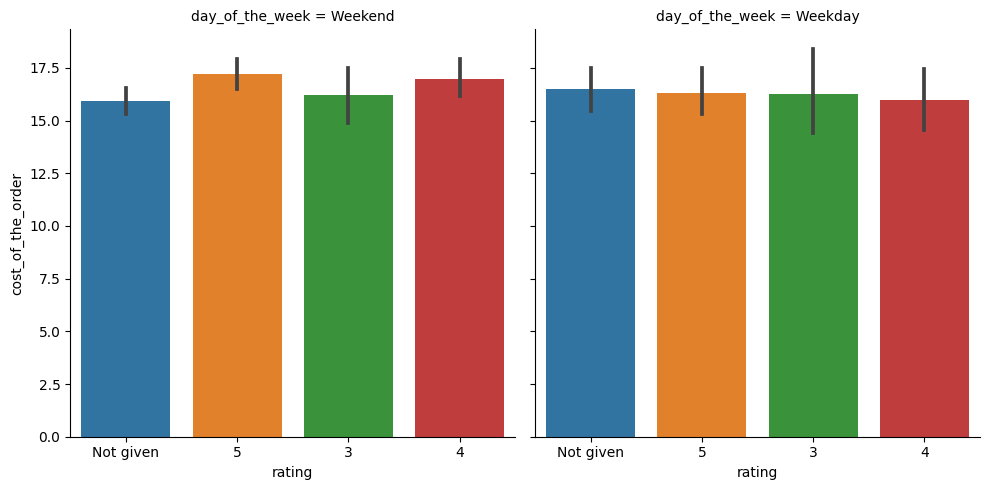

In [ ]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(data=df, x='rating', y='cost_of_the_order')   ## Complete the code to visualize the relationship between rating and cost of the order using pointplot

#Compare relationship between rating and cost of the order during Weekdays and Weekends
sns.catplot(data=df, x="rating", y="cost_of_the_order", col="day_of_the_week", kind='bar')

plt.show()

*   The cost of order for orders with rating 3, are lower  than orders rated 4 and 5.
* However, the orders rated 4 is higher that orders rated 3 and lower than orders rated 5.
* So, it seems like there is a very very low negative correlation between rating and cost of orders.
* There is not a very big difference in cost between orders placed on weekdays and weekends. But, the cost of orders placed on weekends are very slightly higher than orders placed on weekdays.

#### Pairplot

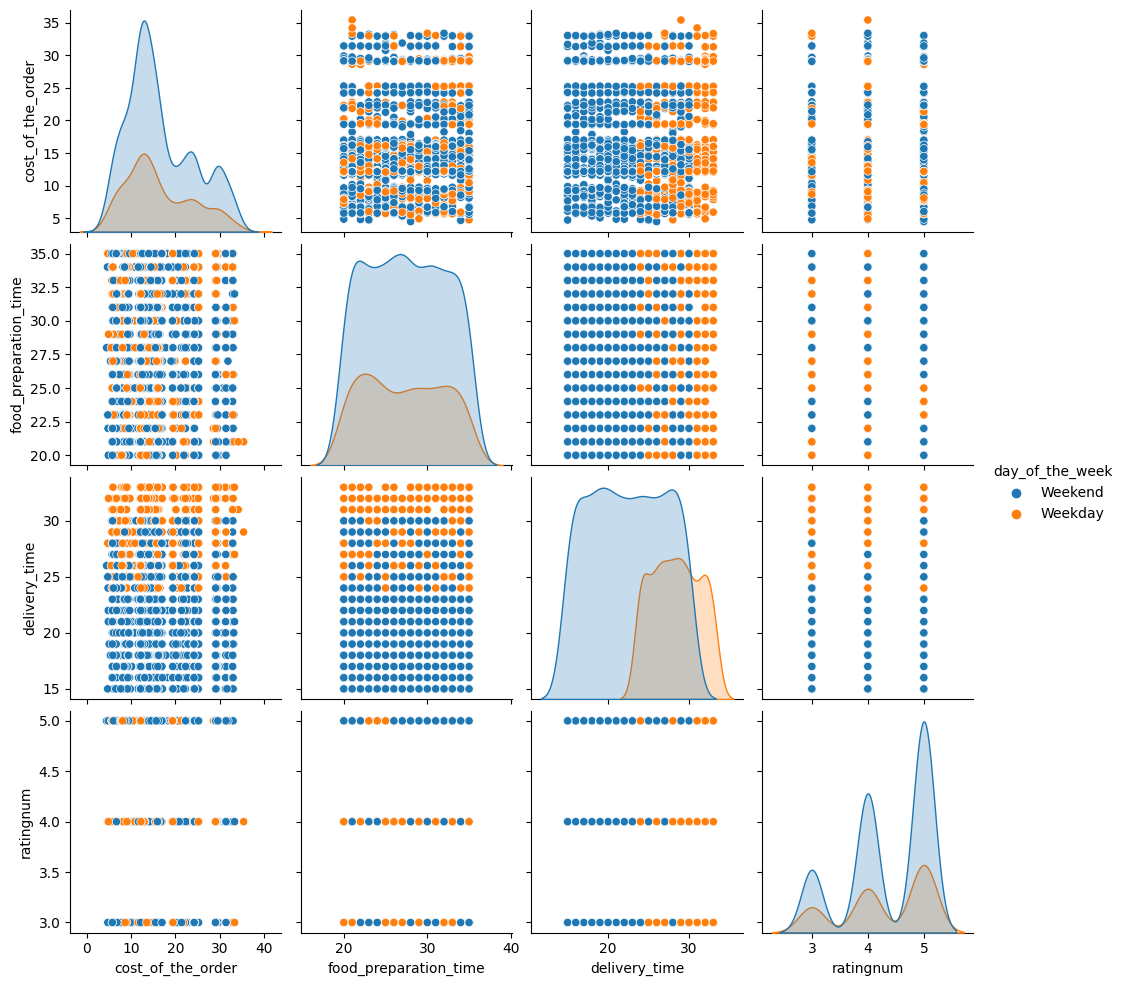

In [ ]:
# Pairplot to see the relationships between cost_of_the_order,food_preparation_time, delivery_time during weekends and weekdays
sns.pairplot(data=df, vars=['cost_of_the_order','food_preparation_time', 'delivery_time','ratingnum'], hue='day_of_the_week');

#### Correlation among variables with heatmap

<ipython-input-633-07cd104cfc8f>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-633-07cd104cfc8f>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



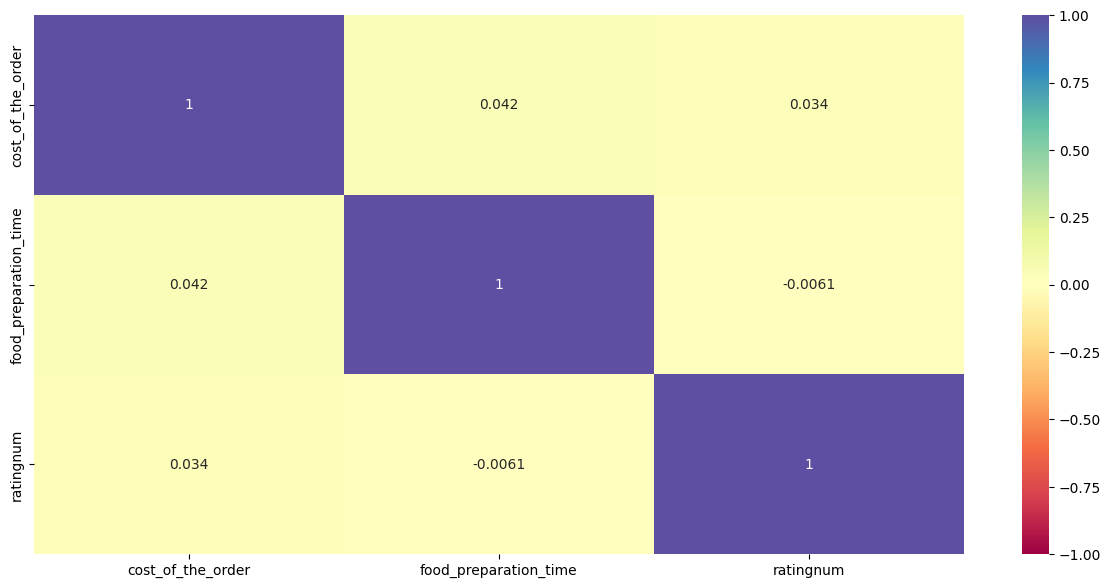

In [ ]:
#Let us find the correlation and plot the heatmap
corr = df.corr()
plt.figure(figsize=(15, 7))
sns.heatmap(data=df[['cost_of_the_order','day_of_the_week','food_preparation_time', 'ratingnum']].corr(), annot=True, vmin=-1, vmax=1,cmap="Spectral");
plt.show()

#### Observations:

*   From the above pairplot and the heatmap, the correlations are very week.
*   The cost is slightly positively correlated to te food preparation time. So that shows that if the food preparation time is higher, then the cost is also slightly higher. But, this is a very very weak positive correlation.
*   There is a very weak negative correlation between delivery time and cost. So, if the delivery time increases, the cost of the order decreases very slightly.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# df['ratingnum'] is a numerical column obtained by performing df['ratingnum'] = df['rating'].astype('int')
# as calculated in Question 5.
df['ratingnum']=df[df['rating']!='Not given']['rating'].astype(int)
df_rated = df[~df['ratingnum'].isna()]
df_rated_counts = df_rated.groupby('restaurant_name')['ratingnum'].count().sort_values(ascending = False).reset_index()


df_bestrated = df_rated_counts[df_rated_counts['ratingnum']>50]['restaurant_name']
df_copy = df_rated[df_rated['restaurant_name'].isin(df_bestrated)].copy()

df_mean = round(df_copy.groupby('restaurant_name')['ratingnum'].mean(),2)
df_mean.sort_values(ascending = False)


restaurant_name
The Meatball Shop            4.51
Blue Ribbon Fried Chicken    4.33
Shake Shack                  4.28
Blue Ribbon Sushi            4.22
Name: ratingnum, dtype: float64

#### Observations:

*   The restaurants that fulfill the criteria of having more than 50 ratings and have a mean rating of more than 4 are:

    1. The Meatball Shop with mean rating 4.51
    2. Blue Ribbon Fried Chicken with mean rating
     4.33
    3. Shake Shack with mean rating 4.28
    4. Blue Ribbon Sushi with mean rating 4.22

*   The above 4 restaurants are qualified to get the promotional offer in advertisement.
*   There are a lot of rating information missing in the dataset, about 38.78% missing rating data. In order to get a provide a promotional offer in a better manner, we must try to collect more ratings or we may perform Imputation as shown in the below Extra step section.




####**Extra step - Mean Imputing ratingnum (numerical ratings that are not "Not given") column**

#### Step 1: Find orders data whose restaurant's missing ratings percentage is less than 40%

In [ ]:
#df['ratingnum'] is a numerical colume obtained by performing df['ratingnum']=df[df['rating']!='Not given']['rating'].astype(int)
# as calculated in Question 5.

#Get the counts of the ratings of all the restaurants, sort in a descending order and reset the index.
df_rating_count = df.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()

#Get the counts of the ratings of all the restaurants with ratings not equal to "Not given", sort in a descending order and reset the index.
df_ratingnum_count = df.groupby(['restaurant_name'])['ratingnum'].count().sort_values(ascending = False).reset_index()

#Get the number of orders rating as "Not given"
df_ratingnum_count['no_rating'] = df_rating_count['rating'] - df_ratingnum_count['ratingnum']


# This is the total number of orders (1898)
df_ratingnum_count['tot_rating']=df_rating_count['rating']

#Find the perc of unrated orders
df_ratingnum_count['perc_norate'] = round(((df_ratingnum_count['no_rating']/df_ratingnum_count['tot_rating'])*100),2)

#select only the null rating percentage less than 40%
df_keep = df_ratingnum_count[df_ratingnum_count['perc_norate'] < 40]

#copy from the df dataframe only the data corresponding to the restaurants whose missing rating percentage is less than 60%
df_fill = df[df['restaurant_name'].isin(df_keep['restaurant_name'])].copy()

# Now we can use fillna method to fill the null values by the mean of ratingnum grouped by each restaurant.
df_fill['ratingnum'] = df_fill['ratingnum'].fillna(value=df_fill.groupby(['restaurant_name'])['ratingnum'].transform('mean'))

#check to see if there are any more null ratings in the df_fill data set
df_fill.groupby('restaurant_name')['ratingnum'].count().sort_values(ascending = False).reset_index()
df_fill.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1323 entries, 1 to 1897
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1323 non-null   int64  
 1   customer_id            1323 non-null   int64  
 2   restaurant_name        1323 non-null   object 
 3   cuisine_type           1323 non-null   object 
 4   cost_of_the_order      1323 non-null   float64
 5   day_of_the_week        1323 non-null   object 
 6   rating                 1323 non-null   object 
 7   food_preparation_time  1323 non-null   int64  
 8   delivery_time          1323 non-null   int64  
 9   ratingnum              1323 non-null   float64
 10  total_time             1323 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 124.0+ KB


####Step 2: Impute the df_fill with mean value grouped by restaurant name using fillna() method

In [ ]:
 #
df_fill_rated = df_fill[~df_fill['ratingnum'].isna()]
df_fill_rated_counts = df_fill_rated.groupby('restaurant_name')['ratingnum'].count().sort_values(ascending = False).reset_index()


df_fill_bestrated = df_fill_rated_counts[df_fill_rated_counts['ratingnum']>50]['restaurant_name']
df_fill_copy = df_fill_rated[df_fill_rated['restaurant_name'].isin(df_fill_bestrated)].copy()

df_fill_mean = round(df_fill_copy.groupby('restaurant_name')['ratingnum'].mean(),2)
df_fill_mean.sort_values(ascending = False)

restaurant_name
The Meatball Shop            4.51
Blue Ribbon Fried Chicken    4.33
Shake Shack                  4.28
RedFarm Broadway             4.24
Blue Ribbon Sushi            4.22
RedFarm Hudson               4.18
Parm                         4.13
Name: ratingnum, dtype: float64

#### Extra step Observations:

*   The restaurants that fulfill the criteria of having more than 50 ratings and have a mean rating of more than 4 are:

    1. The Meatball Shop with mean rating 4.51
    2. Blue Ribbon Fried Chicken with mean rating
     4.33
    3. Shake Shack with mean rating 4.28
    4. RedFarm Broadway with mean rating 4.24
    5. Blue Ribbon Sushi with mean rating 4.22
    6. RedFarm Hudson with mean rating 4.18
    7. Parm with mean rating 4.13
*   The above 7 restaurants are qualified to get the promotional offer in advertisement when you perform mean imputation.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Function to calculate the revenue charge per order
def compute_rev(x):
  if x > 20:
    return x * 0.25
  elif x > 5:
    return x * 0.15
  else:
    return x * 0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev)
df.head()


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,ratingnum,total_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,NaN,45,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,NaN,48,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,5.0,51,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,3.0,40,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,4.0,49,1.7385


In [ ]:
#Calculate the total revenue
total_rev = df['Revenue'].sum()
print("The net revenue is around: ", round(total_rev,2),'dollars')

The net revenue is around:  6166.3 dollars


#### Observations:
*   The net revenue is around 6166.3 dollars.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Create a new column called total_time in df dataframe that is the sum of food_preparation_time and the delivery_time.
#This time will represent the total time it takes for the customer to receive the food from the time he/ she places the order.
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# The below code will calculate the number of orders that take more than 60 mins to reach the customer from the time they ordered it.
df_60_count = df[df['total_time'] > 60]['order_id'].count()

#The total number of all orders can be calculated as shown below:
df_totord_count = df.shape[0]

#Now to calculate the percentage of orders that take 60 mins total time
perc_60 = (df_60_count / df_totord_count) * 100

print("The percentage of orders take more than 60 minutes to get delivered from the time the order is placed: ",round(perc_60,2),"%")



The percentage of orders take more than 60 minutes to get delivered from the time the order is placed:  10.54 %


#### Observations:

*   The percentage of orders take more than 60 minutes to get delivered from the time the order is placed:  10.54 %
*   We might want to reduce this time to less than




### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Calculate the mean delivery time grouped by day_of _the _week.
df_deltime_mean = df.groupby('day_of_the_week')['delivery_time'].mean()

print("The mean delivery time on Weekdays is: ", round(df_deltime_mean.Weekday,2))
print("The mean delivery time on Weekends is: ", round(df_deltime_mean.Weekend,2))

The mean delivery time on Weekdays is:  28.34
The mean delivery time on Weekends is:  22.47


#### Observations:

*   The mean delivery time on Weekdays is:  28.34
*   The mean delivery time on Weekends is:  22.47
*   The mean delivery time during Weekdays is higher than Weedends. This could be due to lesser traffic congestion on Weekends. Most of the people do not work Weekends which might cause less traffic, allowing faster delivery.



### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  From the above analysis of the dataset we can conclude that there are more orders placed during Weekends vs Weekdays
*  American cuisine is the most popular cuisine and Vietnamese cuisine is the least ordered
*  Delivery time is lesser during the weekends (mean 22.47 min) and increases during Weekdays (28.34 min). This could probably be due to rush hour traffic during working weekdays.
*  About 38.78% or orders are unrated. We can impute the missing data (as done in question 13 extra step) and perform unvariate, bivariate and multivariate analysis to get more insights.
*  Some of the cuisines add up to very less number (a over 4%) of orders compared to the top 6 cuisine types.
*  Some restaurants have very low orders or rated lower than other restaurants of the same cuisine type and we need to dig deeper as to why that might be the reason.
*  We may collect more revenue of 25% for orders that cost more than 20 dollars and 15% for orders that cost more than 5 dollars.
*  Our total time required to deliver the order needs to be lessened during Weekdays. Currently the mean total time is around 55.55 mins during Weekday and 49.91 min during Weekend.
* There are vey low correlations between food preparation time, delivery time, cost and rating

### Recommendations:

*  To get better understanding, we need to get more ratings from customers. My be we can provide some incentive to encourage the customers to give ratings.
*  Delivery times during working weekdays have to be improved.
*  We can gather more information regarding the customers so that we can get better understanding of the customer's age, ethnicity, choices, etc. and this might provide more insights on the kinds of foods they are more likely to order and from which restaurants etc. This might help us to predict future sales and provide promotions etc.
* We may collect the location of the restaurants and customers so that we may build a recommendation feature in our app or website to provide a better user experience.
*  We may need to dig deeper to explore the variations of demand during not just weekday and weekends but also holidays. For that we need to collect information regarding popular holidays and the types of foods that might be consumed during those holidays. For example, we may expect to sell more chocolates, deserts or cakes during Valentine's day, we may want to sell turkey during Thanksgiving holiday or pub food during St. Patrick's day, etc. This might help us to advertise those restaurants better and couls also run promotions and specials to boost sales.
*  We may also want to collect the information regarding the speciality of restaurants (such as Vegan restaurant, Vegetarian restaurant etc.) we are doing business with.
*  We can collect data regarding the peak times when the demad is more and when is the off peak times so that we are prepared to serve the customers faster maintaining a good delivery time.
*  We could build machine learning models for the better supply-demand predictions.
* Some restaurants and cuisine types have very low orders. So, we may drop those observations to analyse the data better and gain more insights.


---